## Blacbox notebook

In this notebook we will just see to how to use the library.

### Importing the three methods
- Saliency
- GuidedBackPropagation
- GCAM

In [1]:
from blacbox import Saliency
from blacbox import RaceClassifier
from blacbox import GuidedBackPropagation
from blacbox import GCAM
import numpy as np
import torch
import cv2
import torchvision.transforms as transforms
import torch
import torchvision.models as models

Note: RaceClassifier is just a sample model we have used in this notebook

### About Raceclassifier
- Note that we have used clf.model here. The reason being our clf model isn't of type nn.Module
The model used in this example is used for classifying the race, age and gender of a person. Just for fun we will see an image of dog as well!

In [2]:
clf = RaceClassifier()

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Loading some sample images

In [4]:
image1 = cv2.imread('blacbox/architectures/images/black.png')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.imread('blacbox/architectures/images/dog.png')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

### Preprocessing the images

In [5]:
def preprocess_image(image):
        transform = transforms.Compose([
                        
                        transforms.ToPILImage(),
                        transforms.Resize((224, 224)),
                        transforms.ToTensor(),
                        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])


        ])

        image = transform(image)
        return image

In [6]:
image1 = preprocess_image(image1)
image2 = preprocess_image(image2)

### Converting to batches as it is required

In [7]:
images = torch.stack((image1, image2), axis = 0)

### Using the reveal method with class_idx as max one

In [8]:
model = models.resnet50(pretrained = True)

In [9]:
maps = Saliency(clf.model)
saliencie = maps.reveal(images = images, class_idx = "keepmax")

In [10]:
saliencie.shape

(2, 224, 224, 1)

In [11]:
import matplotlib.pyplot as plt

### Original image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


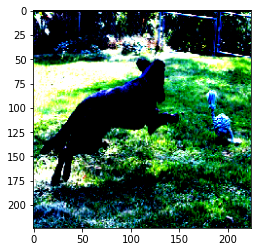

In [12]:
plt.imshow(images[1].permute(1,2,0).numpy())

### Saliency Map

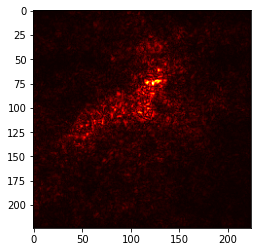

In [13]:
plt.imshow(saliencie[1], cmap='hot')

### Using the GBP method
- Note that we have used clf.model here. The reason being our clf model isn't of type nn.Module
- In a normal scenario we could have just passed the model 
- Example : \
    model = models.resnet18(pretrained = True) \
    gbp = GuidedBackPropagation(model = model, device = device)

In [14]:
gbp = GuidedBackPropagation(model = clf.model, device = device)

In [15]:
grads = gbp.reveal(images = images)

In [16]:
grads.shape

(2, 224, 224, 3)

In [17]:
import matplotlib.pyplot as plt

### Original image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


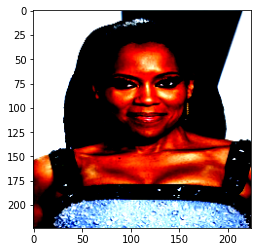

In [18]:
plt.imshow(images[0].permute(1,2,0).numpy())

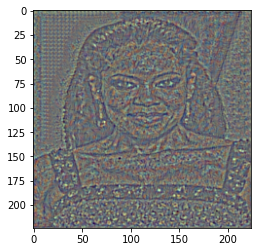

In [19]:
plt.imshow(grads[0])

### Bonus example:p

In [20]:
gbp = GuidedBackPropagation(model = model, device = device)

### Passing a path instead (Only single image is allowed currently)

In [21]:
grads = gbp.reveal(path = 'blacbox/architectures/images/dog.png')

In [22]:
grads.shape

(1, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


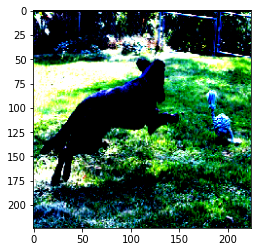

In [23]:
plt.imshow(images[1].permute(1,2,0).numpy())

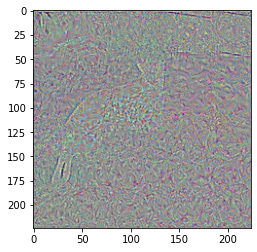

In [24]:
plt.imshow(grads[0])

### Using the GCAM method
- As mentioned we have used clf.model as the model in this example isn't of type nn.Module hence we required to do this explicitly

In [25]:
gcam = GCAM(
    model = clf.model,
    interpolate = 'bilinear'
)

### This method provides a lot of colormaps to visualize and the layer to visualize as well


### Types of colormaps: 
    "autumn": cv2.COLORMAP_AUTUMN, 
    "bone": cv2.COLORMAP_BONE, 
    "jet" : cv2.COLORMAP_JET, 
    "winter" : cv2.COLORMAP_WINTER, 
    "rainbow" : cv2.COLORMAP_RAINBOW, 
    "ocean" : cv2.COLORMAP_OCEAN, 
    "summer" : cv2.COLORMAP_SUMMER, 
    "spring" : cv2.COLORMAP_SPRING, 
    "cool" : cv2.COLORMAP_COOL, 
    "hsv" : cv2.COLORMAP_HSV, 
    "pink" : cv2.COLORMAP_PINK, 
    "hot" : cv2.COLORMAP_HOT 

In [32]:
heatmap = gcam.reveal(images = images, module = clf.model.layer4[0].conv1, class_idx = 'keepmax', colormap = 'hot')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


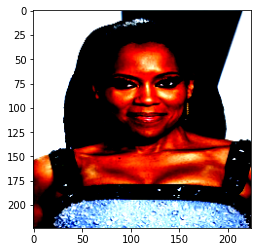

In [33]:
plt.imshow(images[0].permute(1,2,0).numpy())

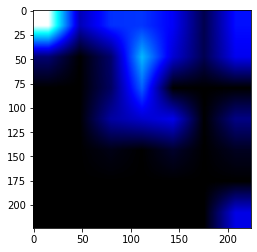

In [34]:
plt.imshow(heatmap[1])

### Once generated overlay the image on top of the original image using overlay method

In [29]:
overlaid_image = gcam.overlay(heatmap, images, is_np = True)

In [30]:
overlaid_image.shape

(2, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


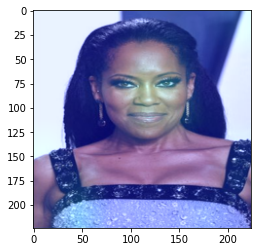

In [31]:
plt.imshow(overlaid_image[0].astype(int))